In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


Exercice 1 : Chargement et exploration initiale
Objectif : Charger le dataset et comprendre sa structure

À FAIRE :

Charger le fichier CSV (2023-2024_NBA_Player_Stats.csv)

Afficher les 10 premières lignes

Afficher les informations sur le dataset (.info())

Afficher les statistiques descriptives (.describe())

Vérifier les valeurs manquantes

Afficher les colonnes disponibles

In [2]:
df = pd.read_csv("./nba.csv", sep=";", encoding="latin-1")

df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,...,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,...,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,...,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,...,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,...,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

In [4]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,...,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,282.209524,26.155102,40.880272,18.440816,18.264762,2.972789,6.423401,0.442687,0.909116,2.582449,...,0.689493,0.822041,2.423265,3.239184,1.934150,0.587347,0.383946,0.943946,1.456735,8.022313
std,166.858903,4.371745,25.581293,25.024108,9.735524,2.356999,4.783384,0.119501,0.848969,2.166629,...,0.255147,0.732770,1.741203,2.320766,1.800255,0.393774,0.400733,0.758414,0.784284,6.481825
min,1.000000,19.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.500000,23.000000,17.000000,0.000000,10.600000,1.300000,3.000000,0.400000,0.200000,0.900000,...,0.657500,0.300000,1.100000,1.600000,0.700000,0.300000,0.100000,0.400000,0.900000,3.400000
50%,290.000000,25.000000,41.000000,5.000000,17.200000,2.300000,5.000000,0.446000,0.700000,2.100000,...,0.760000,0.600000,2.100000,2.800000,1.300000,0.500000,0.300000,0.700000,1.400000,6.100000
75%,423.500000,29.000000,64.500000,29.000000,26.450000,4.150000,8.700000,0.500000,1.400000,3.700000,...,0.833000,1.100000,3.350000,4.300000,2.600000,0.800000,0.500000,1.300000,2.000000,11.050000
max,572.000000,39.000000,84.000000,82.000000,37.800000,11.500000,23.600000,0.800000,4.800000,11.800000,...,1.000000,4.600000,10.100000,13.700000,10.900000,2.100000,3.600000,4.400000,3.600000,34.700000


In [5]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

## preprocessing

In [6]:
df_clean = df.copy()

df_clean = df_clean.drop(columns=["Player", "Tm", "Rk", "Age"])

df_clean['Pos'] = df_clean['Pos'].str.split("-").str[0]

print(df_clean['Pos'].value_counts())

df_clean

Pos
SF    158
SG    155
PG    151
PF    149
C     122
Name: count, dtype: int64


,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,PF,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,C,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,PF,49,18,24.2,3.2,6.1,0.525,0.3,1.0,0.260,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,C,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,SG,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,PF,10,0,8.9,1.1,2.1,0.524,0.0,0.1,0.000,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,PG,54,54,36.0,8.0,18.7,0.430,3.2,8.7,0.373,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,C,48,12,11.4,2.1,3.8,0.538,0.1,0.5,0.208,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,C,43,0,7.4,0.6,1.4,0.419,0.0,0.1,0.333,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


In [7]:
target = "Pos"

X = df_clean.drop(target, axis=1)
y = df_clean[target]

print(f"Forme de X : {X.shape}")
print(f"Forme de y : {y.shape}")

Forme de X : (735, 25)
Forme de y : (735,)


In [8]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()

X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)


## Comparaison des modèles

In [9]:
models = {
    "Logistic Reg" : LogisticRegression(random_state=42),
    "Decision tree" : DecisionTreeClassifier(random_state=42, max_depth=5),
    "Random Forest" : RandomForestClassifier(random_state=42, max_depth=5, n_estimators=50)
}

In [10]:
results = []

for name, model in models.items():
    model.fit(X_train_prep, y_train)

    train_score = model.score(X_train_prep, y_train)
    test_score = model.score(X_test_prep, y_test)
    diff = abs(train_score - test_score)

    results.append({
        'Model': name,
        'Train': train_score,
        'Test': test_score,
        "Diff": diff
    })


In [11]:
comp = pd.DataFrame(results)
comp = comp.sort_values("Test", ascending=False)
comp

,Model,Train,Test,Diff
2,Random Forest,0.755102,0.455782,0.299320
1,Decision tree,0.595238,0.428571,0.166667
0,Logistic Reg,0.586735,0.414966,0.171769


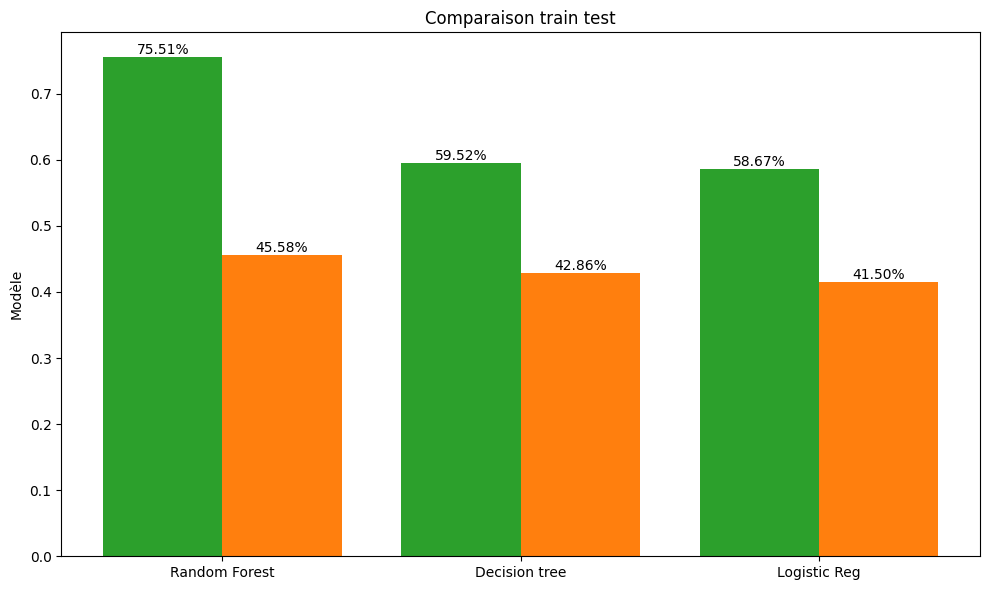

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

x = np.arange(len(comp))
width = 0.40

bar1 = ax.bar(x-width/2, comp["Train"], width, label="Train", color="#2ca02c")
bar2 = ax.bar(x+width/2, comp["Test"], width, label="Test", color="#ff7f0e")

ax.set_ylabel("Modèle")
ax.set_title("Comparaison train test")
ax.set_xticks(x)
ax.set_xticklabels(comp["Model"])
ax.legend

for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, 
                f"{height:.2%}", ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.show()

In [13]:
best = comp.iloc[0]

print(f"Meilleur modèle : {best['Model']}")

Meilleur modèle : Random Forest


## Partie 2

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_pred = model.predict(X_test)

    metrics = {
        'Model': model_name,
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-score': f1_score(y_test, y_pred, average='macro')
    }

    return metrics, y_pred

all_metrics = []
predictions = {}

for name, model in models.items():
    metrics, y_pred = evaluate_model(model, X_train_prep, X_test_prep, y_train, y_test, name)
    all_metrics.append(metrics)
    predictions[name] = y_pred

metrics_df = pd.DataFrame(all_metrics)

metrics_df

,Model,Precision,Recall,F1-score
0,Logistic Reg,0.414063,0.424530,0.418838
1,Decision tree,0.456813,0.432446,0.428061
2,Random Forest,0.479576,0.463065,0.466589


In [15]:
for name, model in models.items():
    y_pred = predictions[name]
    print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           C     0.5769    0.6250    0.6000        24
          PF     0.2222    0.2000    0.2105        30
          PG     0.5938    0.6333    0.6129        30
          SF     0.4194    0.4062    0.4127        32
          SG     0.2581    0.2581    0.2581        31

    accuracy                         0.4150       147
   macro avg     0.4141    0.4245    0.4188       147
weighted avg     0.4064    0.4150    0.4103       147

              precision    recall  f1-score   support

           C     0.6190    0.5417    0.5778        24
          PF     0.3810    0.2667    0.3137        30
          PG     0.4444    0.5333    0.4848        30
          SF     0.3396    0.5625    0.4235        32
          SG     0.5000    0.2581    0.3404        31

    accuracy                         0.4286       147
   macro avg     0.4568    0.4324    0.4281       147
weighted avg     0.4489    0.4286    0.4213       147

              precisio

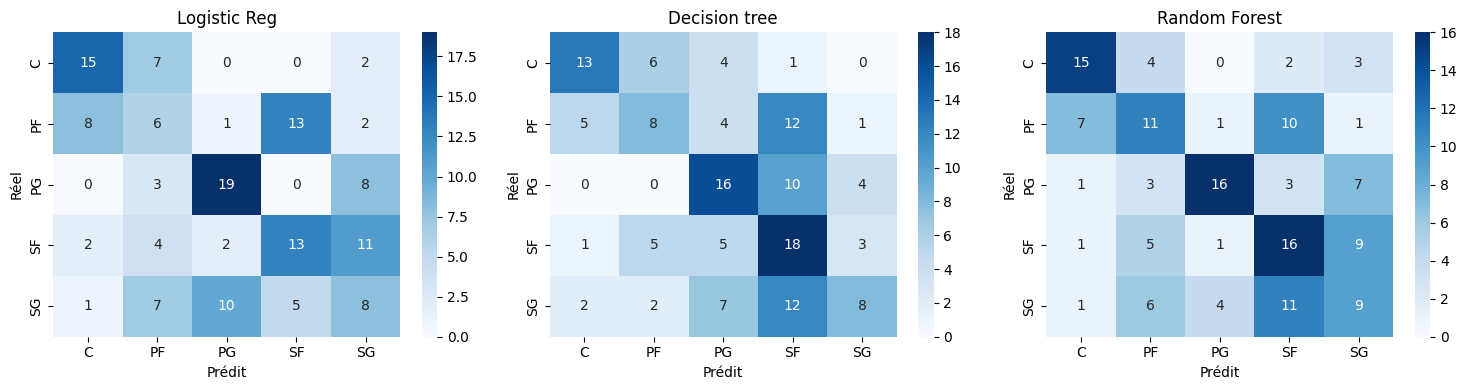

In [16]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15,4))

for idx, (name, model) in enumerate(models.items()):
    y_pred = predictions[name]
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    sns.heatmap(cm, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_, ax=axes[idx], annot=True)
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Prédit")
    axes[idx].set_ylabel("Réel")

plt.tight_layout()
plt.show()

## Optimisation

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_base = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    rf_base,
    param_grid_rf,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_prep, y_train)

print(f"Meilleurs paramètres: {grid_search_rf.best_params_}")

rf_optimized = grid_search_rf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


    Métrique     Avant     Après
0  Precision  0.479576  0.479420
1     Recall  0.463065  0.466815
2   F1-Score  0.466589  0.465867


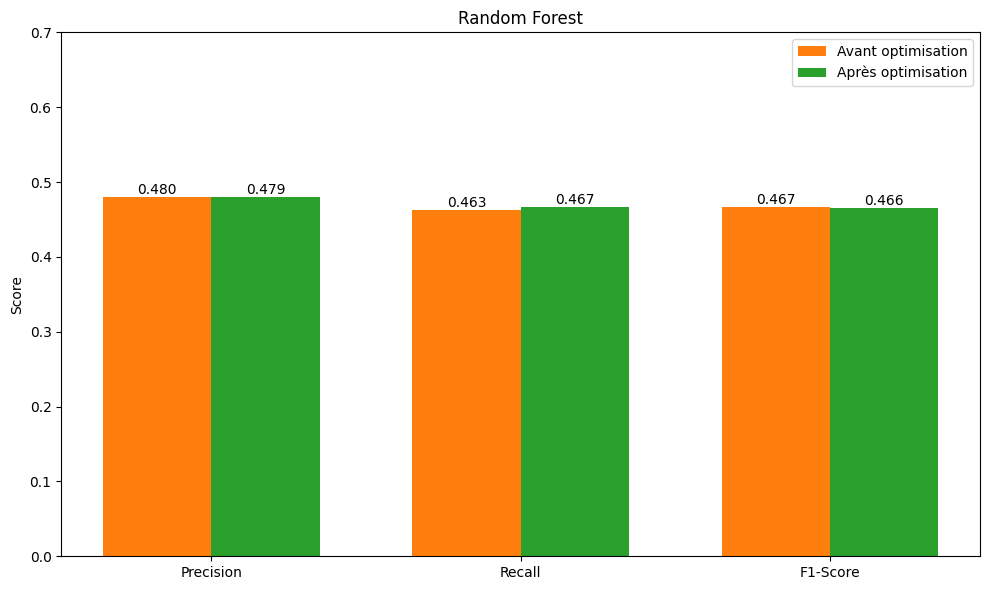

In [18]:
rf_base_model = models['Random Forest']

# Prédictions
y_pred_base = rf_base_model.predict(X_test_prep)
y_pred_opt = rf_optimized.predict(X_test_prep)

# Métriques avant
precision_before = precision_score(y_test, y_pred_base, average='macro')
recall_before = recall_score(y_test, y_pred_base, average='macro')
f1_before = f1_score(y_test, y_pred_base, average='macro')

# Métriques après
precision_after = precision_score(y_test, y_pred_opt, average='macro')
recall_after = recall_score(y_test, y_pred_opt, average='macro')
f1_after = f1_score(y_test, y_pred_opt, average='macro')

comparison_rf = pd.DataFrame({
    'Métrique': ['Precision', 'Recall', 'F1-Score'],
    'Avant': [precision_before, recall_before, f1_before],
    'Après': [precision_after, recall_after, f1_after]
})

print(comparison_rf)

comparison_rf['Amélioration'] = comparison_rf['Après'] - comparison_rf['Avant']
comparison_rf['Amélioration (%)'] = (comparison_rf['Amélioration'] / comparison_rf['Avant'] * 100).round(2)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(comparison_rf))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_rf['Avant'], width, label='Avant optimisation', color='#ff7f0e')
bars2 = ax.bar(x + width/2, comparison_rf['Après'], width, label='Après optimisation', color='#2ca02c')

ax.set_ylabel('Score')
ax.set_title('Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(comparison_rf['Métrique'])
ax.legend()
ax.set_ylim(0, 0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(), 
                f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

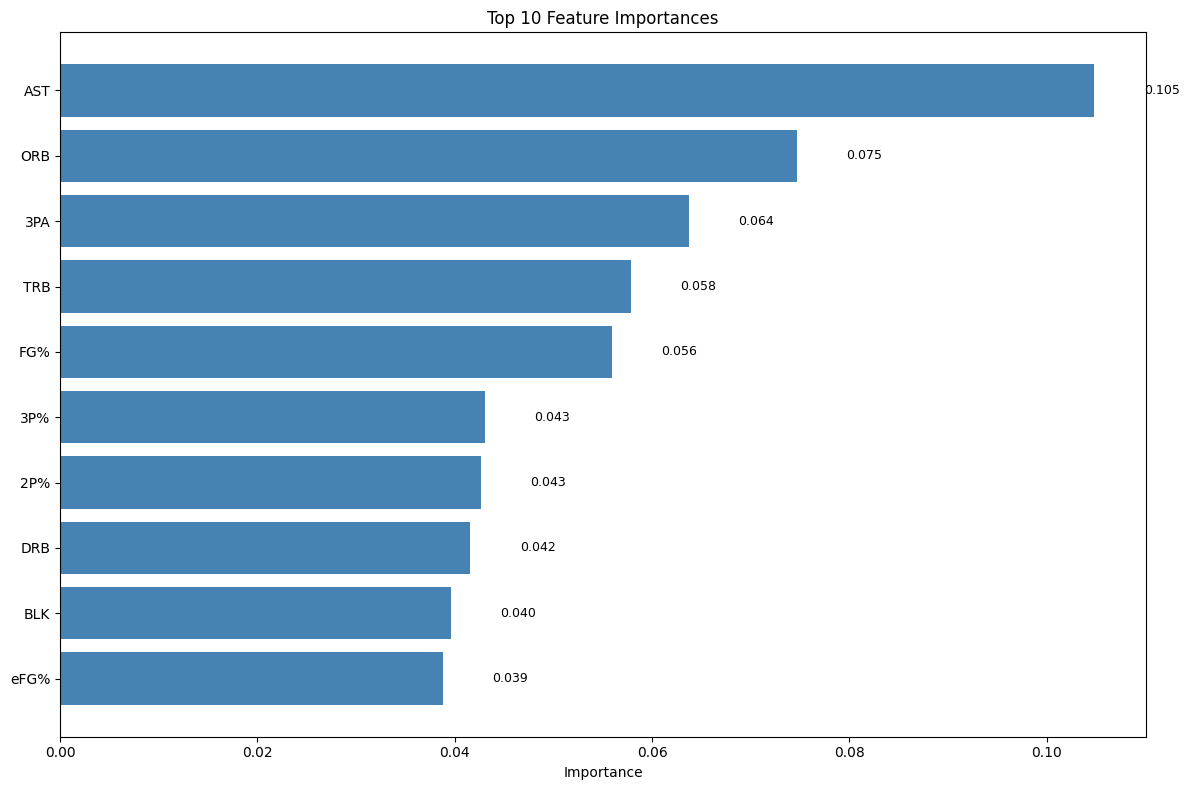

In [19]:
feature_names = X.columns
importances = rf_optimized.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)


fig, ax = plt.subplots(figsize=(12, 8))
top_n = 10
top_features = feat_imp_df.head(top_n)

bars = ax.barh(range(top_n), top_features['Importance'].values, color='steelblue')
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'].values)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title(f'Top {top_n} Feature Importances')

for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Analyse SHAP

In [20]:
import shap

explainer = shap.TreeExplainer(rf_optimized)

shap_values = explainer.shap_values(X_test_prep)

c:\Users\Administrateur\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


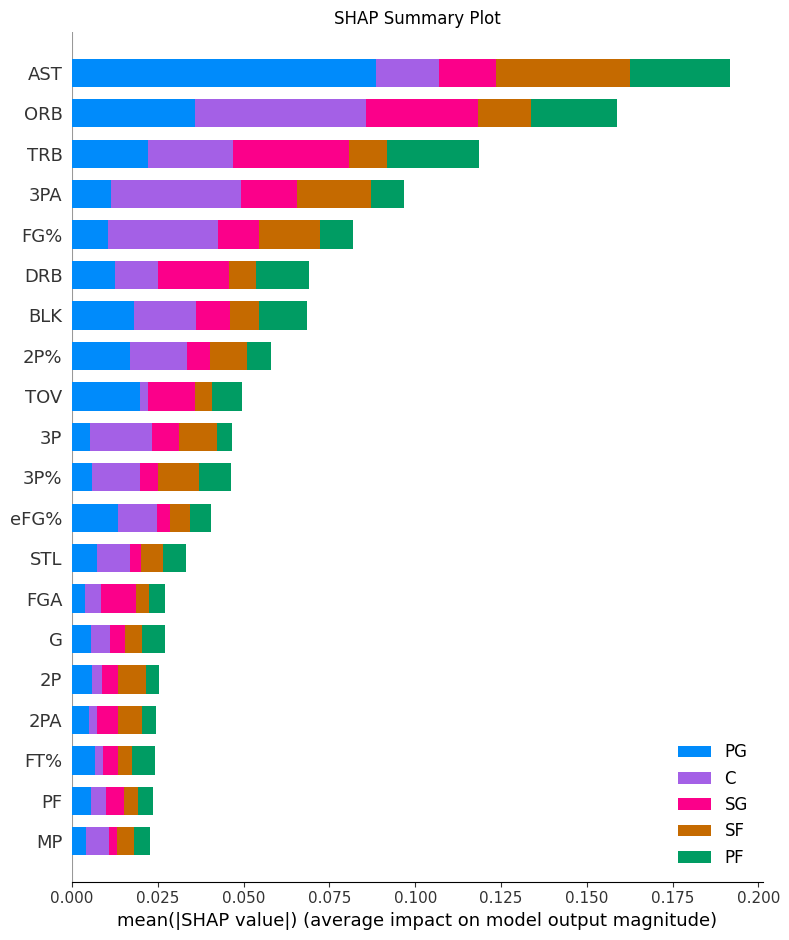

In [24]:

class_names = rf_optimized.classes_

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_prep, class_names=class_names, feature_names=feature_names, show=False, plot_type="bar")
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()

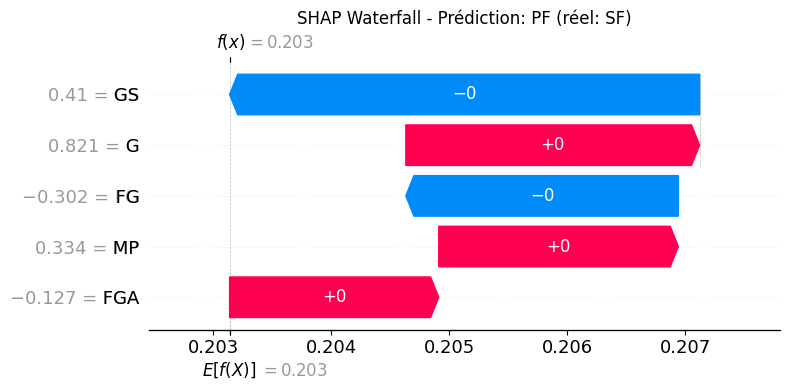

In [26]:
sample_idx = 10
sample_pred = rf_optimized.predict(X_test_prep[sample_idx].reshape(1, -1))[0]
sample_true = y_test.iloc[sample_idx]
pred_class_idx = list(class_names).index(sample_pred)

plt.figure(figsize=(12, 8))
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[pred_class_idx][sample_idx],
        base_values=explainer.expected_value[pred_class_idx],
        data=X_test_prep[sample_idx],
        feature_names=feature_names.tolist()
    ),
    show=False
)
plt.title(f"SHAP Waterfall - Prédiction: {sample_pred} (réel: {sample_true})")
plt.tight_layout()
plt.show()